In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
%matplotlib inline

In [3]:
'''
Prep Course
U2.L4

task:  Select a data set, visualize the data in some way, draw some conclusions
data:  Swine flu and general symptom incidence across a very small sample

question: Can we start to observe something meaningful from visualizing relationships  
          existing in this extremely small sample size?
'''

# read data into data frame
df = pd.read_csv('./swineflu.csv')
print(df)


  Chill RunnyNose Headache Fever             Swine Flu?
0   Yes        No     Mild   Yes                     No
1   Yes       Yes       No    No                   Yes 
2   Yes        No   Strong   Yes                    Yes
3    No       Yes     Mild   Yes                    Yes
4    No        No       No    No                     No
5    No       Yes   Strong   Yes                    Yes
6    No       Yes   Strong    No                     No
7   Yes       Yes     Mild   Yes  yes                  


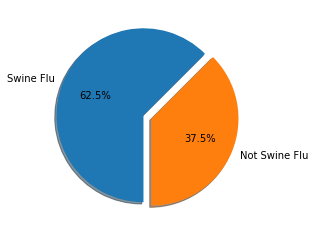

'~2/3 of the total sample population are infected with the Swine Flu\nwith 62.5% infected and 37.5% not infected.'

In [23]:
#1. Pie chart showing swine flu proportion in the total sample population

# values
swine_flu = df['Swine Flu?']
regex_yes = r'\s*[Y|y]es\s*'
swine_flu_yes = df[swine_flu.str.match(regex_yes)]
swine_flu_pct = (len(swine_flu_yes) / len(swine_flu)) * 100
swine_flu_no_pct = 100 - swine_flu_pct

# chart data
labels = ['Swine Flu', 'Not Swine Flu']
sizes = [swine_flu_pct, swine_flu_no_pct]
explode = (0.1,0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=45, explode=explode)

plt.show()
'''~2/3 of the total sample population are infected with the Swine Flu
with 62.5% infected and 37.5% not infected.'''

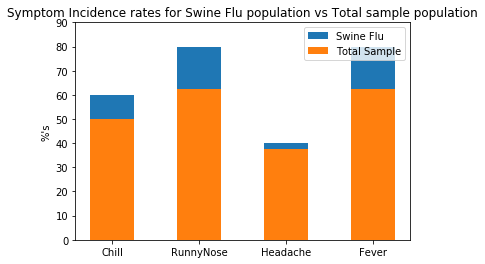

'For every symptom - the incidence of the symptom in the swine flu population is higher than that in the general population.\nWe may have indication that individuals exhibiting these symptoms are more likely to be infected with the \nswine flu.  Runny nose and fever are not only the most prevalent symptoms in the population - but are also seemingly\nmore indicative of swine flu infection than other symptoms.'

In [24]:
#2. Stacked bar graph showing the %'s of symptom incidence in swine flu sufferers vs the total sample population

swine_flu_match = swine_flu.str.match(regex_yes)

# determine the % of swine flu population exhibiting a given symptom
def percentage_swine_flu_with_symptom(symptom):
    success_state = regex_yes
    if symptom == 'Headache':
        success_state = 'Strong'
    symptom_match = df[symptom].str.match(success_state)
    return (len(df[lambda dfx: swine_flu_match & symptom_match]) / len(df[swine_flu_match])) * 100

# determine the % of a given symptom in the total population sample
def percentage_total_with_symptom(symptom):
    success_state = regex_yes
    if symptom == 'Headache':
        success_state = 'Strong'
    symptom_match = df[symptom].str.match(success_state)
    return (len(df[symptom_match]) / len(df[symptom])) * 100

# values
symptoms = ['Chill', 'RunnyNose', 'Headache', 'Fever']
swine_flu_pcts = [percentage_swine_flu_with_symptom(symptom) for symptom in symptoms]
total_pcts = [percentage_total_with_symptom(symptom) for symptom in symptoms]

# chart data
N = len(symptoms)
indeces = np.arange(N)
width = .5
p1 = plt.bar(indeces, swine_flu_pcts, width)
p2 = plt.bar(indeces, total_pcts, width)
plt.ylabel('%\'s')
plt.title('Symptom Incidence rates for Swine Flu population vs Total sample population')
plt.xticks(indeces, tuple(symptoms))
plt.yticks(np.arange(0,100,10))
plt.legend((p1[0], p2[0]), ('Swine Flu', 'Total Sample'))

plt.show()
'''For every symptom - the incidence of the symptom in the swine flu population is higher than that in the general population.
We may have indication that individuals exhibiting these symptoms are more likely to be infected with the 
swine flu.  Runny nose and fever are not only the most prevalent symptoms in the population - but are also seemingly
more indicative of swine flu infection than other symptoms.'''

/home/wallebot/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


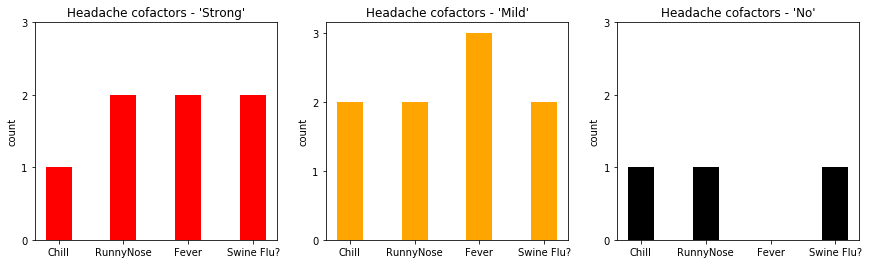

"Sample is very small - however the picture here would be to get some visual indication for the impact of the headache symptom.\nSome evidence of correlation between the headache state and the incidence of other symptoms, or swine flu.\nFrom this current sample - strong and mild headaches behave similarly in their existence as part of swine flu symptoms, but not\nhaving a headache is a necessary symptom for swine flu diagnosis.  A mild headache might have a stronger relationship\nwith other symptoms like 'Fever' and 'Chill' - but not necessarily a stronger indicator of swine flu infection."

In [98]:
#3. Bar graph subplots showing symptoms and swine flu incidence across Headache states of 'Strong', 'Mild', 'No'

headache_cofactors = ['Chill', 'RunnyNose', 'Fever', 'Swine Flu?']

# determine headache cofactor incidence by headache state
def determine_headache_influence(state):
    return [(len(df[df['Headache'] == state][df[cofactor].str.match(regex_yes)])) for cofactor in headache_cofactors]

# values
headache_states = ['Strong', 'Mild', 'No']
headache_influence_data = np.array([determine_headache_influence(state) for state in headache_states])

# chart data
N = 4
ind = np.arange(N)
width = 0.4

plt.figure(figsize=(20, 4))

# strong headache 
plt.subplot(1, 4, 1)
headache_state_strong = headache_influence_data[0].tolist()
plt.bar(ind, headache_state_strong, width, color='red')

plt.ylabel('count')
plt.title('Headache cofactors - \'Strong\'')
plt.xticks(ind, (headache_cofactors))
plt.yticks(np.arange(0, 4, 1))

# mild headache
plt.subplot(1, 4, 2)
headache_state_mild = headache_influence_data[1].tolist()
plt.bar(ind, headache_state_mild, width, color='orange')

plt.ylabel('count')
plt.title('Headache cofactors - \'Mild\'')
plt.xticks(ind, (headache_cofactors))
plt.yticks(np.arange(0, 4, 1))

# no headache
plt.subplot(1, 4, 3)
headache_state_no = headache_influence_data[2].tolist()
plt.bar(ind, headache_state_no, width, color='black')

plt.ylabel('count')
plt.title('Headache cofactors - \'No\'')
plt.xticks(ind, (headache_cofactors))
plt.yticks(np.arange(0, 4, 1))

plt.show()
'''Sample is very small - however the picture here would be to get some visual indication for the impact of the headache symptom.
Some evidence of correlation between the headache state and the incidence of other symptoms, or swine flu.
'Strong' and 'Mild' headaches behave similarly in their existence as part of swine flu symptoms.  Headache
is not a necessary symptom for swine flu diagnosis at any degree.  A mild headache might have a stronger relationship
with other symptoms like 'Fever' and 'Chill' - but not necessarily a stronger indicator of swine flu infection.''' 